1. Загрузите данные в DataFrame с помощью функции read_csv библиотеки
pandas.

In [1]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Разделите данные на обучающую и тестовую выборки с помощью функции
train_test_split

In [2]:
classes = diabetes['Outcome']
features = diabetes.drop('Outcome', axis=1)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=0.3, random_state=42)

3. Постройте дерево решений с помощью класса
DecisionTreeClassifier с гиперпараметрами по умолчанию

In [4]:
from sklearn.tree import DecisionTreeClassifier

model_default = DecisionTreeClassifier()
model_default.fit(X_train, y_train)

DecisionTreeClassifier()

4. Отобразите дерево решений с глубиной 2. Опишите процесс принятия
решения.

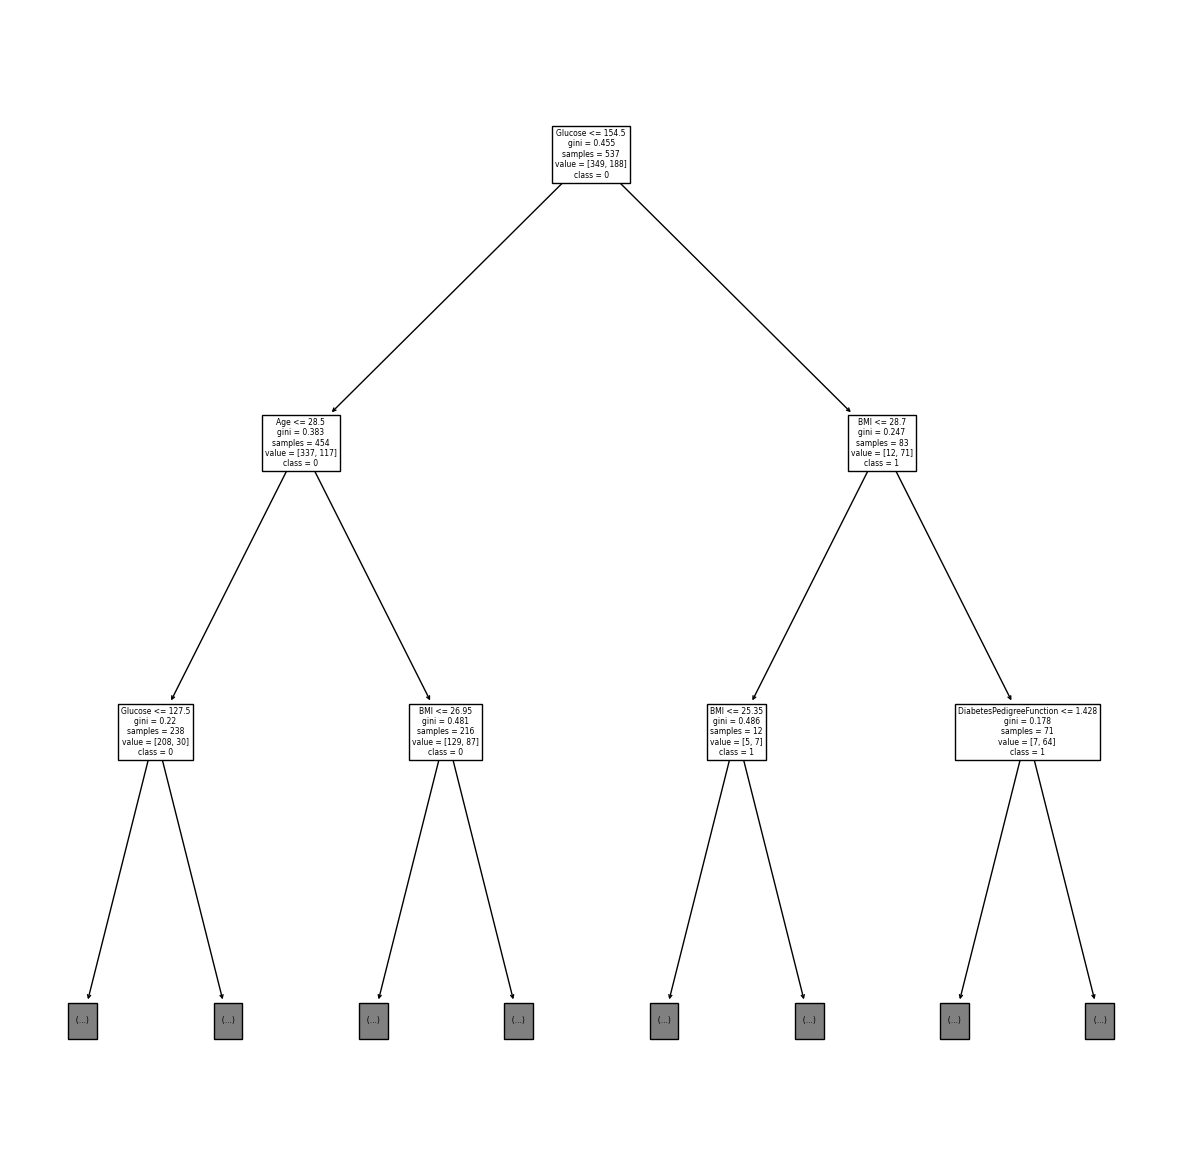

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
plot_tree(model_default, feature_names=features.columns, class_names=['0', '1'], max_depth=2)
plt.show()

    1)если, уровень сахара меньше либо равен 154.5, то идет по возрасту

    если женщина старше 28.5 лет, то смотрится индекс массы её тела, иначе снова уровень сахара.

    2)Если уровень сахара выше 154.5, то данные переходят в ветвь, где может быть определен диабет, смотрится индекс массы тела: если он больше 28.7, то для дальнейшего определения главным признаком выступает предросположенность к диабету, иначе снова берется индекс массы тела, но уже сравнивается с 25.35

5. Получите информативность признаков. Какие признаки наиболее
значимые, какие - наименее?

In [7]:
model_default.feature_importances_

array([0.01770638, 0.37374463, 0.09895301, 0.06006366, 0.03295847,
       0.20284827, 0.08935369, 0.12437189])

Наиболее значимые признаки:

    концентрация глюкозы в крови
    числовой параметр наследственности
диабета

    индекс массы тела
    возраст
Наименее значимые признаки:

    число случаев беременности
    артериальное диастолическое давление (мм рт. ст.)
    толщина кожной складки трехглавой мышцы (мм)
    2-х часовой сывороточный инсулин

6. Оцените качество модели с помощью функции
classification_report.

In [9]:
from sklearn.metrics import classification_report

y_pred = model_default.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       151
           1       0.54      0.64      0.59        80

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.70      0.69      0.69       231



7. Какая из моделей лучше подходит для диагностики диабета? Линейная
SVM-модель (из задания 14) или дерево решений?

    SVM-модель лучше

8. Подберите оптимальное значение гиперпараметра max_depth с помощью
поиска по сетке (класс GridSearchCV).

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, params)
grid.fit(features, classes)
grid.best_estimator_

DecisionTreeClassifier(max_depth=5)

9. Обучите модель с оптимальным max_depth и оцените результат

In [11]:
model_best = DecisionTreeClassifier(max_depth=5)
model_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

10. Какая из моделей лучше всего решает поставленную задачу? Как Вы
думаете, если уравнять количество наблюдений по классам для обучения
модели, качество улучшится или нет?

    работают одинаково

In [12]:
df_1 = diabetes.loc[diabetes['Outcome'] == 1]
df_0 = diabetes.loc[diabetes['Outcome'] == 0]
df_0 = df_0[:268]
df = df_0.merge(df_1, how='outer')

In [13]:
from sklearn.utils import shuffle

df = shuffle(df)
df.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,61,1,71,48,18,76,20.4,0.323,22,0
1,112,1,79,60,42,48,43.5,0.678,23,0
2,242,1,100,66,29,196,32.0,0.444,42,0
3,336,5,139,80,35,160,31.6,0.361,25,1
4,511,10,115,0,0,0,0.0,0.261,30,1
...,...,...,...,...,...,...,...,...,...,...
531,401,5,0,80,32,0,41.0,0.346,37,1
532,116,6,87,80,0,0,23.2,0.084,32,0
533,508,3,169,74,19,125,29.9,0.268,31,1
534,327,6,102,82,0,0,30.8,0.180,36,1


In [14]:
y = df['Outcome']
x = df.drop('Outcome', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
model_eq = DecisionTreeClassifier(max_depth=5)
model_eq.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [16]:
pred = model_eq.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        70
           1       0.73      0.63      0.67        91

    accuracy                           0.66       161
   macro avg       0.66      0.66      0.66       161
weighted avg       0.67      0.66      0.66       161



    стало только хуже(((